### ~Library Requirements~

In [1]:
# Importing all required libraries
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

import statistics

# Encoding libraries
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

# ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBRegressor


### ~Data-Set~

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(n=10).style.background_gradient(cmap = "Greens_r").set_properties(**{"font-family" : "Segoe UI"})#.hide_index()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,nan,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
5,56669,Male,81.000000,0,0,Yes,Private,Urban,186.210000,29.000000,formerly smoked,1
6,53882,Male,74.000000,1,1,Yes,Private,Rural,70.090000,27.400000,never smoked,1
7,10434,Female,69.000000,0,0,No,Private,Urban,94.390000,22.800000,never smoked,1
8,27419,Female,59.000000,0,0,Yes,Private,Rural,76.150000,nan,Unknown,1
9,60491,Female,78.000000,0,0,Yes,Private,Urban,58.570000,24.200000,Unknown,1


# Data Analysis

In [3]:
# Shape of data
df.shape

(5110, 12)

### //Current Shape
Features = 12<BR>
Samples = 5110

In [4]:
# Checking datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

//id is redundant column - Needs to be dropped

In [6]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
# Dropping redudant column
df.drop(['id'],axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### //Current Shape
Features = 11<BR>
Samples = 5110

### //FEATURES
Numeric : 3<BR>
Categorical (Encoded) : 3 (Targets/Outputs)<BR>
Categorical (Needs to be Encoded) : 5 (Input features)

In [8]:
# Checking null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

//bmi has null values, need to be imputed

In [9]:
# Checking duplicate values
df.duplicated().sum()

0

//no duplicates

# EDA - Initial

In [10]:
print(df["stroke"].value_counts(),"\n")
print(df["hypertension"].value_counts(),"\n")
print(df["heart_disease"].value_counts(),"\n")

0    4861
1     249
Name: stroke, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 



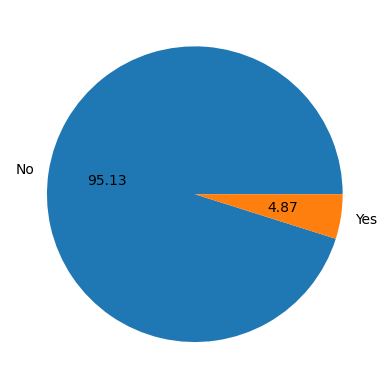

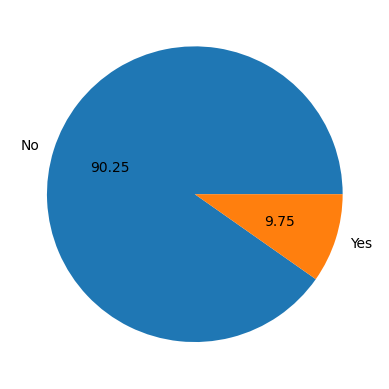

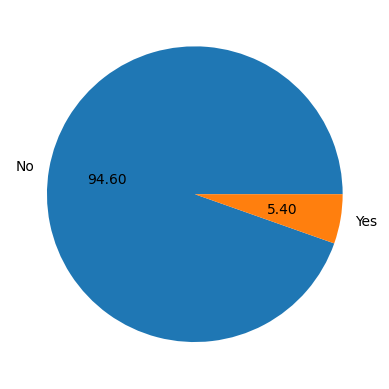

In [12]:
# Let's see the distribution of target variable
# plt.figure(figsize=(12,6))
plt.pie(df['stroke'].value_counts(), labels=['No','Yes'], autopct='%0.2f')
plt.show()
plt.pie(df['hypertension'].value_counts(), labels=['No','Yes'], autopct='%0.2f')
plt.show()
plt.pie(df['heart_disease'].value_counts(), labels=['No','Yes'], autopct='%0.2f')
plt.show()

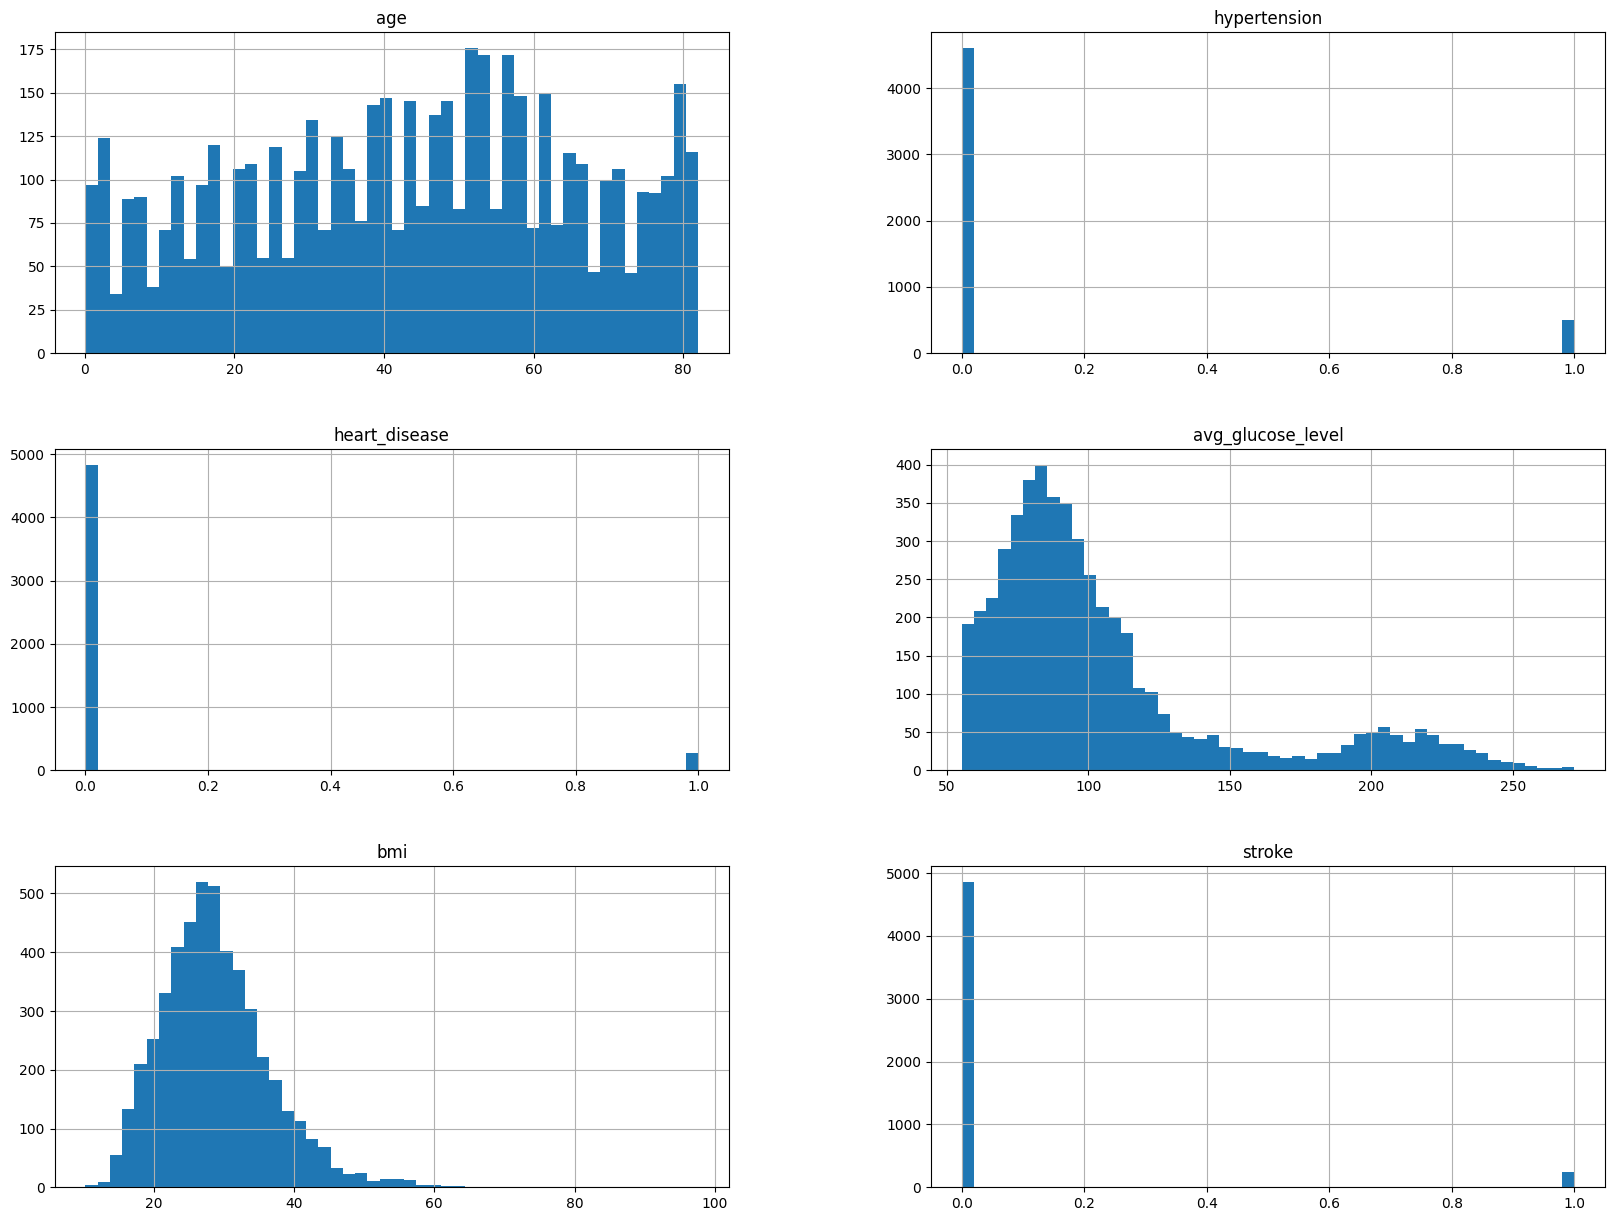

In [13]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
# sns.pairplot(df)

# Preprocessing

### ~Encoding~

In [15]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### Encoding :--
Ordrinal Encoding : 'gender', 'ever_married', 'Residence_type'<BR>
One-Hot Encoding : 'work_type', 'smoking_status'

### ~Label Encoding~

In [17]:
print(df["gender"].value_counts(),"\n")
print(df["ever_married"].value_counts(),"\n")
print(df["Residence_type"].value_counts(),"\n")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 



In [18]:
# age
df['age']=df['age'].astype(int)

# general
df['gender'] = df['gender'].replace('Other',df['gender'].value_counts().idxmax())
mapping = [{'col': 'gender', 'mapping': {"Female": int(0),  "Male": int(1)}}]
df=OrdinalEncoder(cols=['gender'], mapping=mapping).fit(df).transform(df)
df['gender']=df['gender'].astype(int)

# ever_married
mapping = [{'col': 'ever_married', 'mapping': {"Yes": int(1),  "No": int(0)}}]
df=OrdinalEncoder(cols=['ever_married'], mapping=mapping).fit(df).transform(df)
df['ever_married']=df['ever_married'].astype(int)

# Residence_type
mapping = [{'col': 'Residence_type', 'mapping': {"Urban": int(1),  "Rural": int(0)}}]
df=OrdinalEncoder(cols=['Residence_type'], mapping=mapping).fit(df).transform(df)
df['Residence_type']=df['Residence_type'].astype(int)


In [19]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,0,81,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,0,35,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,1,51,0,0,1,Private,0,166.29,25.6,formerly smoked,0


### ~One-Hot Encoding~

In [20]:
print(df["work_type"].value_counts(),"\n")
print(df["smoking_status"].value_counts(),"\n")

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 



In [21]:
df = pd.get_dummies(df, columns = ['work_type','smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,1,80,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,1,83.75,NaN,0,0,0,1,0,0,0,0,1,0
5106,0,81,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,0,35,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,1,51,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


### ~Re-organize Column~

In [22]:
df=df.iloc[:,[0,1,4,5,6,7,9,10,11,12,13,14,15,16,17,2,3,8]]
df

,gender,age,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension,heart_disease,stroke
0,1,67,1,1,228.69,36.6,0,0,1,0,0,0,1,0,0,0,1,1
1,0,61,1,0,202.21,NaN,0,0,0,1,0,0,0,1,0,0,0,1
2,1,80,1,0,105.92,32.5,0,0,1,0,0,0,0,1,0,0,1,1
3,0,49,1,1,171.23,34.4,0,0,1,0,0,0,0,0,1,0,0,1
4,0,79,1,0,174.12,24.0,0,0,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,1,83.75,NaN,0,0,1,0,0,0,0,1,0,1,0,0
5106,0,81,1,1,125.20,40.0,0,0,0,1,0,0,0,1,0,0,0,0
5107,0,35,1,0,82.99,30.6,0,0,0,1,0,0,0,1,0,0,0,0
5108,1,51,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,0,0


In [23]:
# Checking null values
df.isnull().sum()

gender                              0
age                                 0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
hypertension                        0
heart_disease                       0
stroke                              0
dtype: int64

In [24]:
# NORMALIZTION FUNCTION
def normalize(data):
    min = np.min(data)
    max = np.max(data)
    old_range = max - min
    new_min = 0.0
    new_max = 1.0
    new_range = new_max - new_min
    scale = new_range / old_range
    norm_data=[(x - min)*scale + new_min for x in data]
    return(norm_data)
df_norm=df.copy()
for i in df:
    df_norm[i]=normalize(df[i])

<AxesSubplot:>

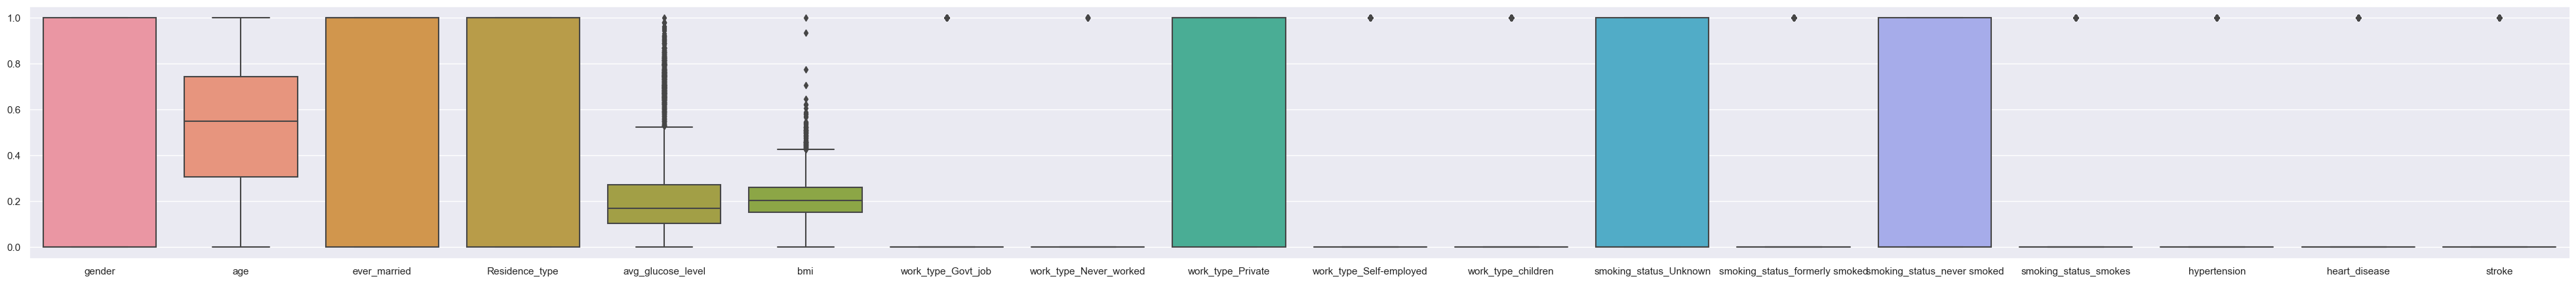

In [25]:
sns.set(font_scale = 1)
sns.set(rc={"figure.figsize":(50, 5)})
sns.boxplot(data=df_norm)

## saving original dataframe for further experiments

In [26]:
data=df.copy()
data

,gender,age,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension,heart_disease,stroke
0,1,67,1,1,228.69,36.6,0,0,1,0,0,0,1,0,0,0,1,1
1,0,61,1,0,202.21,NaN,0,0,0,1,0,0,0,1,0,0,0,1
2,1,80,1,0,105.92,32.5,0,0,1,0,0,0,0,1,0,0,1,1
3,0,49,1,1,171.23,34.4,0,0,1,0,0,0,0,0,1,0,0,1
4,0,79,1,0,174.12,24.0,0,0,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,1,83.75,NaN,0,0,1,0,0,0,0,1,0,1,0,0
5106,0,81,1,1,125.20,40.0,0,0,0,1,0,0,0,1,0,0,0,0
5107,0,35,1,0,82.99,30.6,0,0,0,1,0,0,0,1,0,0,0,0
5108,1,51,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,0,0


//bmi nan removal

<AxesSubplot:ylabel='Density'>

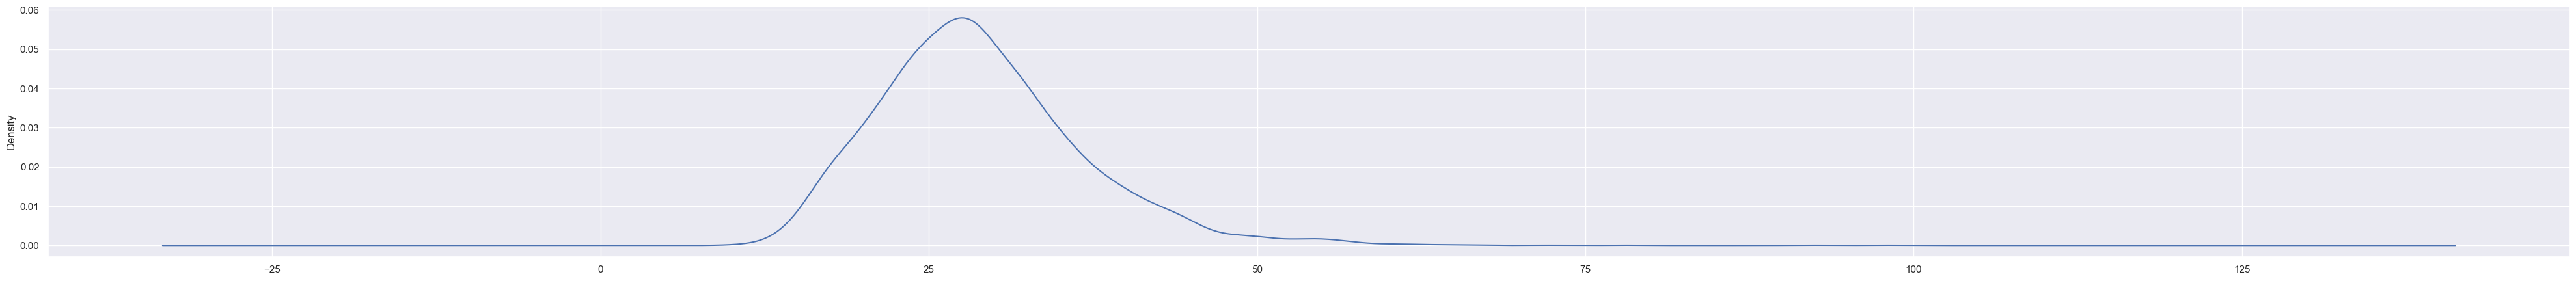

In [27]:
df['bmi'].plot.kde()

In [28]:
df["bmi"] = df["bmi"].replace(np.NaN, statistics.mode(df["bmi"]))
df

,gender,age,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension,heart_disease,stroke
0,1,67,1,1,228.69,36.6,0,0,1,0,0,0,1,0,0,0,1,1
1,0,61,1,0,202.21,28.7,0,0,0,1,0,0,0,1,0,0,0,1
2,1,80,1,0,105.92,32.5,0,0,1,0,0,0,0,1,0,0,1,1
3,0,49,1,1,171.23,34.4,0,0,1,0,0,0,0,0,1,0,0,1
4,0,79,1,0,174.12,24.0,0,0,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,1,83.75,28.7,0,0,1,0,0,0,0,1,0,1,0,0
5106,0,81,1,1,125.20,40.0,0,0,0,1,0,0,0,1,0,0,0,0
5107,0,35,1,0,82.99,30.6,0,0,0,1,0,0,0,1,0,0,0,0
5108,1,51,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,0,0


# EDA - Post-Processing

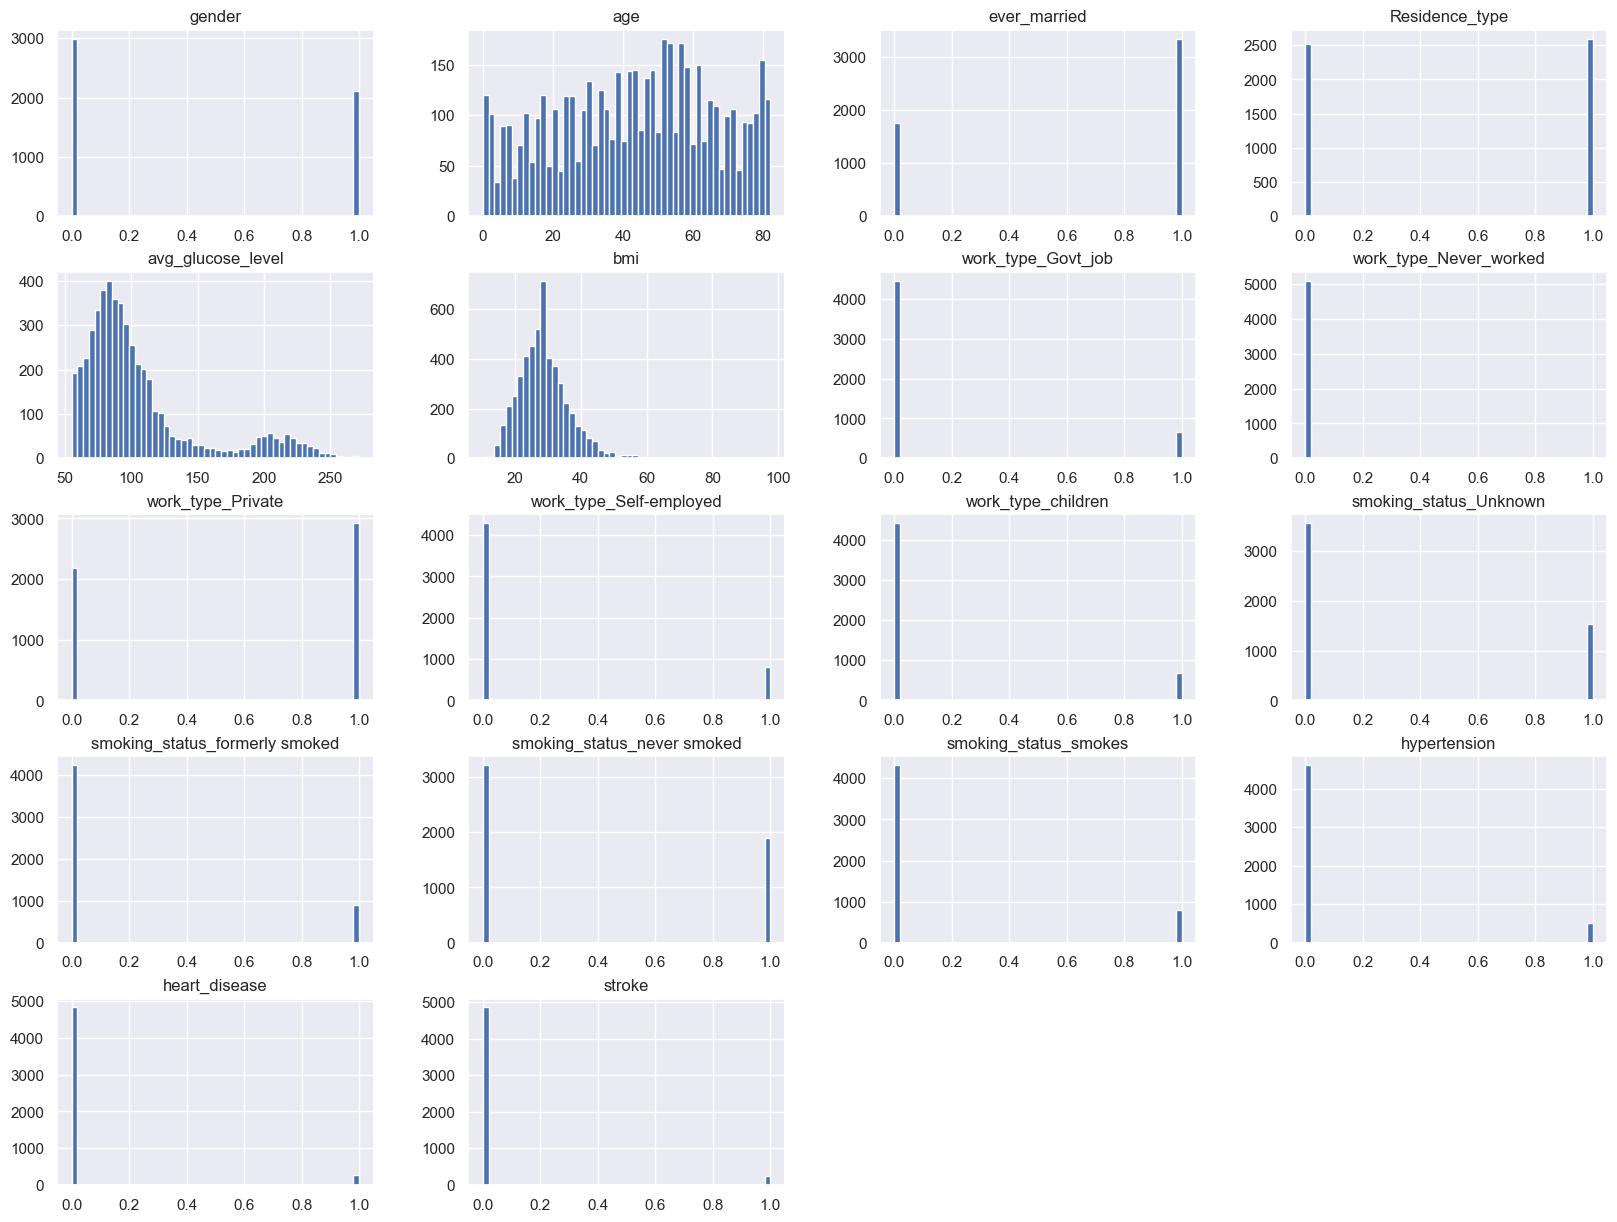

In [29]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [30]:
# sns.pairplot(df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int32  
 1   age                             5110 non-null   int32  
 2   ever_married                    5110 non-null   int32  
 3   Residence_type                  5110 non-null   int32  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   work_type_Govt_job              5110 non-null   uint8  
 7   work_type_Never_worked          5110 non-null   uint8  
 8   work_type_Private               5110 non-null   uint8  
 9   work_type_Self-employed         5110 non-null   uint8  
 10  work_type_children              5110 non-null   uint8  
 11  smoking_status_Unknown          5110 non-null   uint8  
 12  smoking_status_formerly smoked  51

In [32]:
df.shape

(5110, 18)

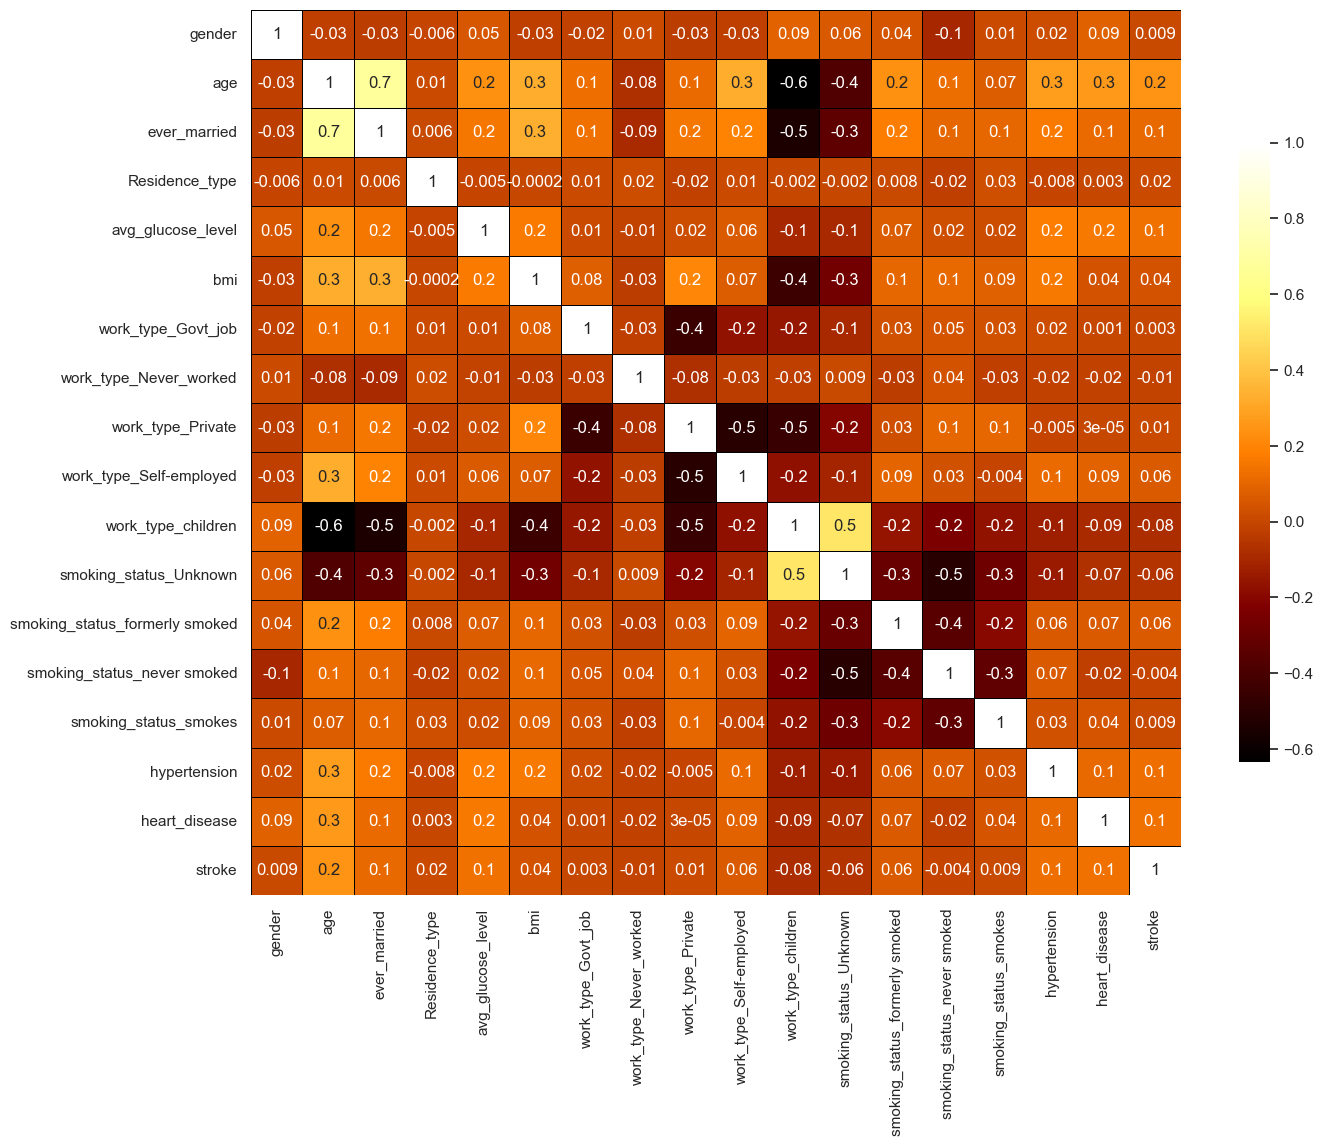

In [33]:
fig = plt.figure(figsize=(15,11.5))
sns.heatmap(df.corr(),  annot=True, 
                        fmt='.1g', 
                        cmap="afmhot", 
                        cbar=True, 
                        cbar_kws={'shrink' : 0.7}, 
                        linewidth=0.6, 
                        linecolor='black')
plt.show()

//Data has acceptable correlation, clean

# Machine Learning Implementation

## Train-Test Split

In [34]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [35]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from tqdm import tqdm
# import os

# tsm=0.1
# rsm=0
# log=0
# ts = 0.3

# for i in tqdm (range(0,1),desc="Loading. . ."):
#     rs = 0
#     pass
#     for j in range(0,10000):
#         x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = ts, random_state=rs)

#         sc=StandardScaler()
#         x_train=sc.fit_transform(x_train)
#         x_test=sc.fit_transform(x_test)

#         ## Regression Model--
#         LRregressor = LogisticRegression()
#         LRregressor.fit(x_train, y_train)
#         LTscore=LRregressor.score(x_test,y_test)
#         if (LTscore*100) >log  :
#             tsm=ts
#             rsm=rs
#             log=LTscore*100
#             os.system('cls')
#             print(tsm)
#             print(rsm)
#             print(log)
#         rs=rs+1
#     ts=ts+0.01

In [36]:
# Splitting the testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8398)

#### Standard Scaling

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train.shape)
print(x_test.shape)

(3577, 17)
(1533, 17)


In [38]:
x_train_df=pd.DataFrame(x_train)
x_test_df=pd.DataFrame(x_test)
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)

df_train_vis=pd.concat([x_train_df, y_train_df], axis=1)
df_test_vis=pd.concat([x_test_df, y_test_df], axis=1)
# sns.pairplot(df_train_vis, hue='stroke')
# sns.pairplot(df_test_vis, hue='stroke')

In [42]:
print(df.nunique())
print(df_train_vis.nunique())
print(df_test_vis.nunique())

gender                               2
age                                 83
ever_married                         2
Residence_type                       2
avg_glucose_level                 3979
bmi                                418
work_type_Govt_job                   2
work_type_Never_worked               2
work_type_Private                    2
work_type_Self-employed              2
work_type_children                   2
smoking_status_Unknown               2
smoking_status_formerly smoked       2
smoking_status_never smoked          2
smoking_status_smokes                2
hypertension                         2
heart_disease                        2
stroke                               2
dtype: int64
0            2
1           83
2            2
3            2
4         2970
5          391
6            2
7            2
8            2
9            2
10           2
11           2
12           2
13           2
14           2
15           2
16           2
stroke       2
dtype: int64
0 

## MODEL SELECTION

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,precision_score,classification_report
from mlxtend.plotting import plot_confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
train_acc_list=[]
test_acc_list=[]
cm=[]
recall=[]
precision=[]
f1=[]
crp=[]
l=[train_acc_list,test_acc_list,cm,recall,precision,f1]

lr = LogisticRegression()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
rf=random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5)
svc=LinearSVC(dual=False)
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10)
models=[lr,gnb,dt,rf,svc,knn]
for model in models:
    model.fit(x_train,y_train)
    train_acc_list.append(round(model.score(x_train,y_train)*100,2))
    y_pred= model.predict(x_test)
    test_ac = accuracy_score(y_test, y_pred)
    cm.append(confusion_matrix(y_test, y_pred))
    test_acc_list.append(round(test_ac*100,2))
    precision.append(precision_score(y_test, y_pred))
    recall.append((y_test, y_pred))
    f1.append((y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [43]:
for i in cm:
    print(i)
    print('\n')

[[1473    1]
 [  57    2]]


[[1474    0]
 [  59    0]]


[[1396   78]
 [  49   10]]


[[1470    4]
 [  58    1]]


[[1474    0]
 [  59    0]]


[[1469    5]
 [  58    1]]




In [44]:
for i,j in zip(models,test_acc_list) :
    print(i,"   ",j,'\n')

LogisticRegression()     96.22 

GaussianNB()     96.15 

DecisionTreeClassifier()     91.72 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 300]})     95.96 

LinearSVC(dual=False)     96.15 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3]})     95.89 

